### Import Statements

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression

## Task 1

In [2]:
data_df = pd.read_csv('task-1.csv')
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [3]:
x = data_df.x.values
y = data_df.y.values

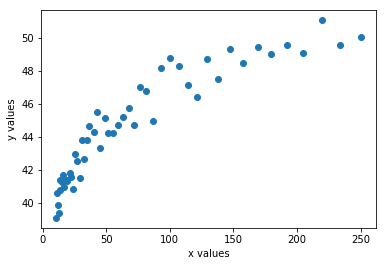

In [4]:
# Plot data points
plt.scatter(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [5]:
coefs = np.polyfit(np.log(x), y, deg=1)
a, b = coefs
coefs

array([ 3.390241  , 31.52920122])

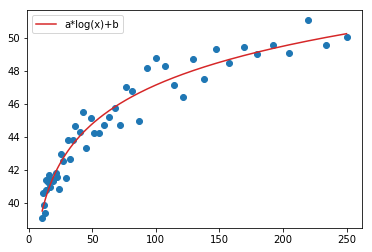

In [6]:
x_values = x
y_values = a*np.log(x_values) + b

# Plot the line
plt.scatter(x, y) # Plot the data
plt.plot(x_values, y_values, c='C3', label='a*log(x)+b') # Prediction line
plt.legend()
plt.show()

In [7]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [8]:
y_pred = np.polyval(coefs, x)
model_rss = RSS(y, y_pred)
model_rss

5423017.342770121

In [9]:
rss_baseline = RSS(y, y.mean())
print('RSS baseline:', rss_baseline)

RSS baseline: 541.1432872199999


In [10]:
R2 = 1 - (model_rss / rss_baseline)
print('R^2 coefficient:', R2)

R^2 coefficient: -10020.407399562571


The model performs way worse than the baseline.

## Task 2

In [11]:
data_df2 = pd.read_csv('task-2.csv')
data_df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [12]:
X = data_df2.drop('y', axis=1).values
y = data_df2.y.values
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
len(X)

1000

In [13]:
x = X_tr[:,0]
y = y_tr

# Compute z-scores
def z_score(y):
    return (y - y.mean()) / y.std()

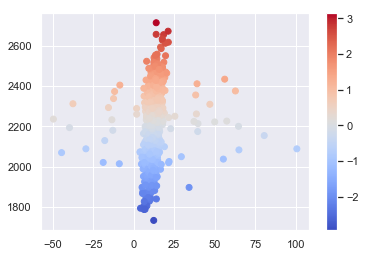

In [14]:
# Activate Seaborn style
sns.set()

# Plot z-scores
plt.scatter(x, y, c=z_score(y), cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

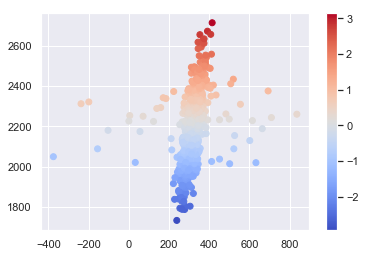

In [15]:
x = X_tr[:,1]

plt.scatter(x, y, c=z_score(y), cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

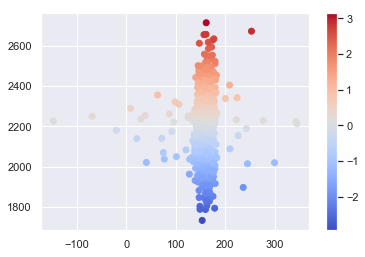

In [16]:
x = X_tr[:,2]

plt.scatter(x, y, c=z_score(y), cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

In [17]:
# Select outliers
def idx(y):
    z_scores = z_score(y)
    index = (np.abs(z_scores < 2))
    return index

# Remove them
X_tr2, y_tr2 = np.column_stack((X_tr[:,0][idx(y)], X_tr[:,1][idx(y)], X_tr[:,2][idx(y)])), y_tr[idx(y)]
X_te2, y_te2 = np.column_stack((X_te[:,0][idx(y_te)], X_te[:,1][idx(y_te)], X_te[:,2][idx(y_te)])), y_te[idx(y_te)]

In [18]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [19]:
# Create a linear regression object
lr_outliers = LinearRegression()
lr_wo = LinearRegression()

# * Linear regression with outliers
lr_outliers.fit(X_tr, y_tr)
y_pred_lr_outliers = lr_outliers.predict(X_te)
mae_lr = MAE(y_te, y_pred_lr_outliers) # MAE of predictions
# Print performance on test set
print('MAE linear regression: {:.3f}'.format(mae_lr))

# * Huber loss
huber = HuberRegressor(epsilon=1.1) # Create object
huber.fit(X_tr, y_tr) # Fit it to train data
y_pred_huber = huber.predict(X_te) # Predictions for test data points
mae_huber = MAE(y_te, y_pred_huber) # MAE of predictions
print('MAE Huber: {:.3f}'.format(mae_huber))

# * Linear regression without outliers
lr_wo.fit(X_tr2, y_tr2)
y_pred_lr_wo = lr_wo.predict(X_te2)
mae_lr_wo = MAE(y_te2, y_pred_lr_wo) # MAE of predictions
# Print performance on test set
print('MAE linear regression without outliers: {:.3f}'.format(mae_lr_wo))

MAE linear regression: 104.788
MAE Huber: 76.643
MAE linear regression without outliers: 95.319
